In [1]:
# Importing Libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataframe

df=pd.read_csv("complaints-2023-12-13_02_35.csv")

In [3]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
df=df.drop_duplicates()

In [5]:
print(df.shape)
df.head()

(316319, 18)


Date received                                            Product  \
0      06/05/23  Credit reporting, credit repair services, or o...   
1      06/05/23                              Vehicle loan or lease   
2      06/05/23  Credit reporting, credit repair services, or o...   
3      06/08/23                                    Debt collection   
4      06/08/23  Credit reporting, credit repair services, or o...   

        Sub-product                                 Issue  \
0  Credit reporting  Incorrect information on your report   
1              Loan           Struggling to pay your loan   
2  Credit reporting           Improper use of your report   
3     I do not know     Attempts to collect debt not owed   
4  Credit reporting  Incorrect information on your report   

                                           Sub-issue  \
0                     Personal information incorrect   
1  Lender trying to repossess or disable the vehicle   
2      Reporting company used your report improperly   
3                  Debt was result of identity theft   
4                     Personal information incorrect   

                        Consumer complaint narrative  \
0  Closed accounts with XXXX  XXXX XXXX on XX/XX/...   
1  I fell behind on my payments when the XXXX car...   
2  I am asking validation of this account, please...   
3                                                NaN   
4                                                NaN   

                             Company public response  \
0                                               None   
1                                               None   
2                                               None   
3                                               None   
4  Company has responded to the consumer and the ...   

                                  Company State ZIP code            Tags  \
0             Early Warning Services, LLC    PA    183XX            None   
1       Consumer Portfolio Services, Inc.    OH    43130            None   
2                     The CBE Group, Inc.    TX    777XX            None   
3              Credit Corp Solutions Inc.    AZ    86403  Older American   
4  TRANSUNION INTERMEDIATE HOLDINGS, INC.    AR    72761   Servicemember   

  Consumer consent provided? Submitted via Date sent to company  \
0           Consent provided           Web             06/05/23   
1           Consent provided           Web             06/05/23   
2           Consent provided           Web             06/05/23   
3       Consent not provided           Web             06/08/23   
4       Consent not provided           Web             06/08/23   

      Company response to consumer Timely response?  Consumer disputed?  \
0          Closed with explanation              Yes                 NaN   
1          Closed with explanation              Yes                 NaN   
2  Closed with non-monetary relief              Yes                 NaN   
3          Closed with explanation              Yes                 NaN   
4          Closed with explanation              Yes                 NaN   

   Complaint ID  
0       7074900  
1       7074426  
2       7074188  
3       7092194  
4       7086972

In [6]:
# Checking Null Values

df.isnull().sum()

Date received                        0
Product                              0
Sub-product                          0
Issue                                0
Sub-issue                            0
Consumer complaint narrative    194796
Company public response              0
Company                              0
State                                0
ZIP code                             0
Tags                                 0
Consumer consent provided?        8842
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              316319
Complaint ID                         0
dtype: int64

In [7]:
# Dropping Null Values from Consumer complaint narrative column

df=df.dropna(subset=["Consumer complaint narrative"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121523 entries, 0 to 316311
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date received                 121523 non-null  object 
 1   Product                       121523 non-null  object 
 2   Sub-product                   121523 non-null  object 
 3   Issue                         121523 non-null  object 
 4   Sub-issue                     121523 non-null  object 
 5   Consumer complaint narrative  121523 non-null  object 
 6   Company public response       121523 non-null  object 
 7   Company                       121523 non-null  object 
 8   State                         121523 non-null  object 
 9   ZIP code                      121523 non-null  object 
 10  Tags                          121523 non-null  object 
 11  Consumer consent provided?    121523 non-null  object 
 12  Submitted via                 121523 non-nul

### Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Reading Dataframe
df=pd.read_csv("complaints-2023-12-13_02_35.csv")

# Drop rows with NaN values for Consumer complaint narrative column
df = df.dropna(subset=['Consumer complaint narrative'])

# Taking top 2000 rows
df=df.head(2000)

In [11]:
# Converting date column into datetime format

from datetime import datetime

df["Date received"] = pd.to_datetime(df["Date received"],format="%m/%d/%y")
df["Date sent to company"] = pd.to_datetime(df["Date sent to company"],format="%m/%d/%y")

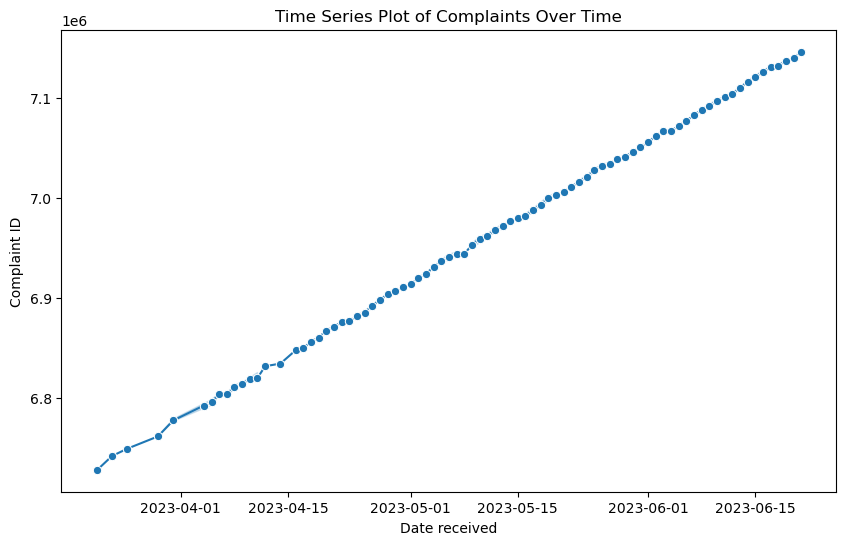

In [12]:
# Plot Time Series for "Date received" and "Complaint ID" column
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date received', y='Complaint ID', data=df, marker='o')
plt.title('Time Series Plot of Complaints Over Time')
plt.xlabel('Date received')
plt.ylabel('Complaint ID')
plt.show()

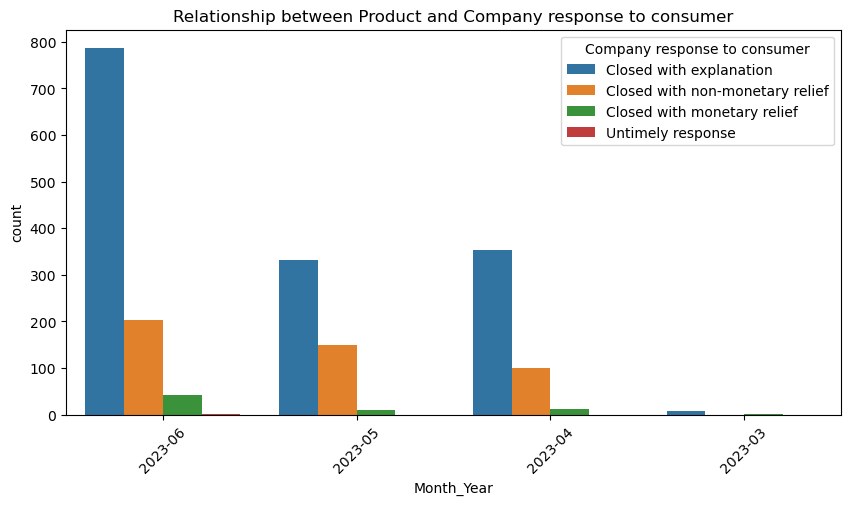

In [13]:
# Explore the relationship between "Month_Year" and "Company response to consumer" Column
df['Month_Year'] = df['Date received'].dt.to_period('M')
plt.figure(figsize = (10, 5))
sns.countplot(x='Month_Year',hue='Company response to consumer',data=df)
plt.title('Relationship between Product and Company response to consumer')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Analysing Product Column

print(f"Number of unique products: {df['Product'].nunique()}")
df["Product"].unique()

Number of unique products: 9


array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Vehicle loan or lease', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Credit card or prepaid card', 'Debt collection', 'Mortgage',
       'Payday loan, title loan, or personal loan', 'Student loan'],
      dtype=object)

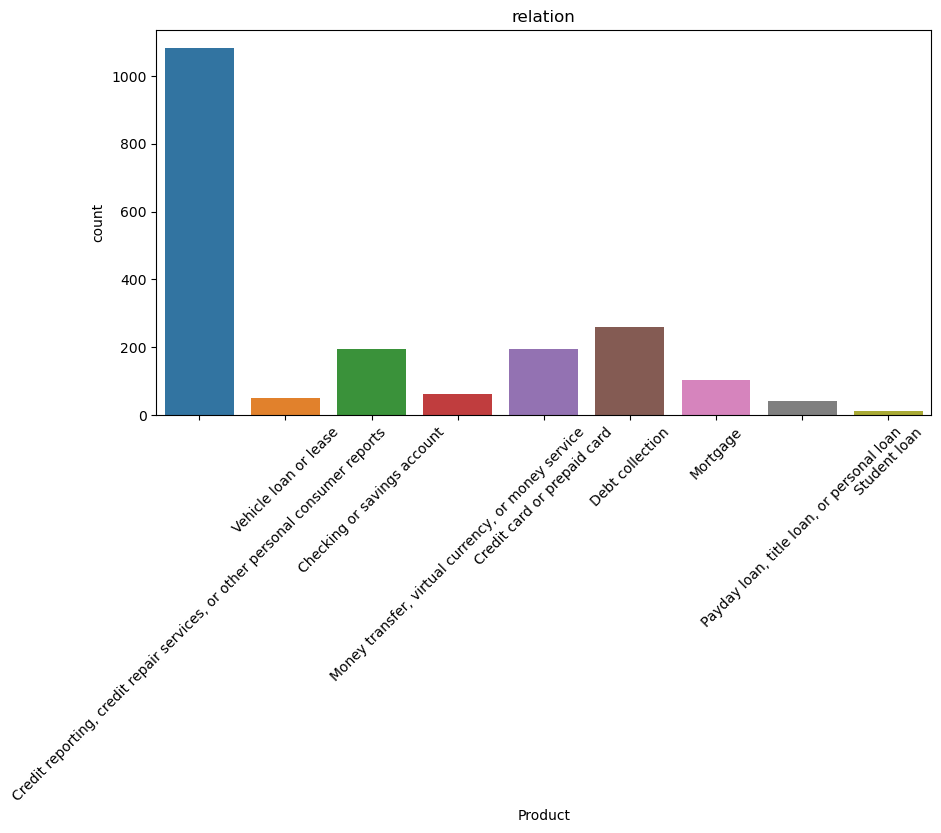

In [15]:
# Visualize the distribution of the "Product" Column
plt.figure(figsize = (10, 5))
sns.countplot(x='Product',data=df)
plt.title('relation')
plt.xticks(rotation=45)
plt.show()

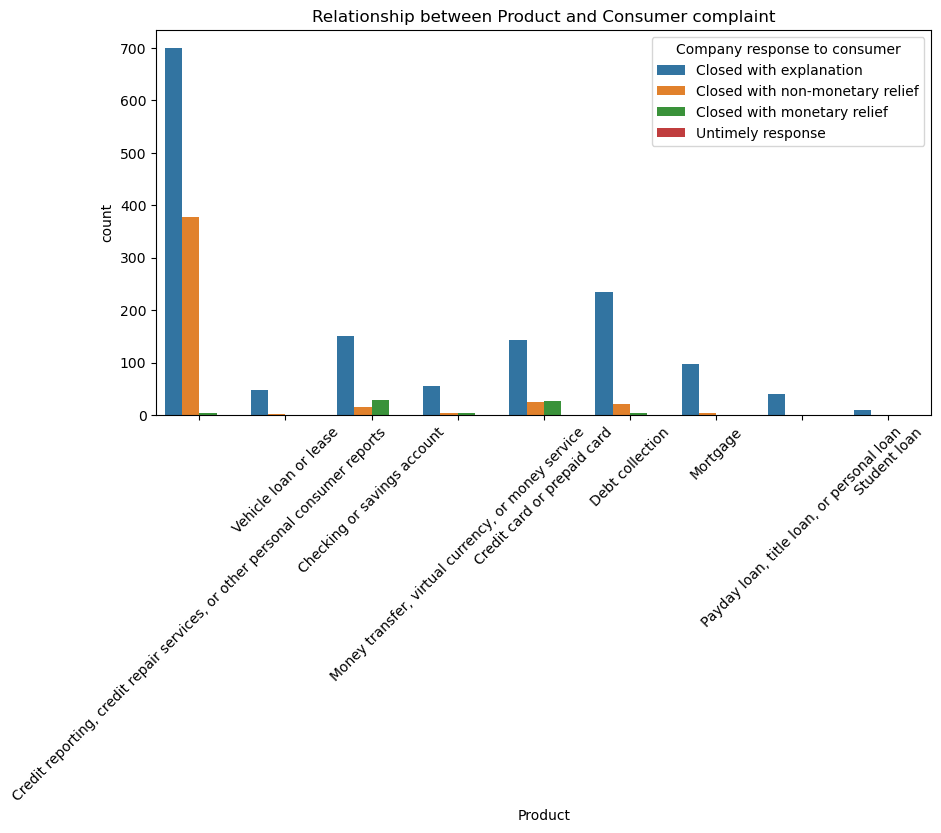

In [16]:
# Relationship between "Product" and "Consumer complaint narrative" Column
plt.figure(figsize = (10, 5))
sns.countplot(x='Product', hue='Company response to consumer', data=df)
plt.title('Relationship between Product and Consumer complaint')
plt.xticks(rotation=45)
plt.show()

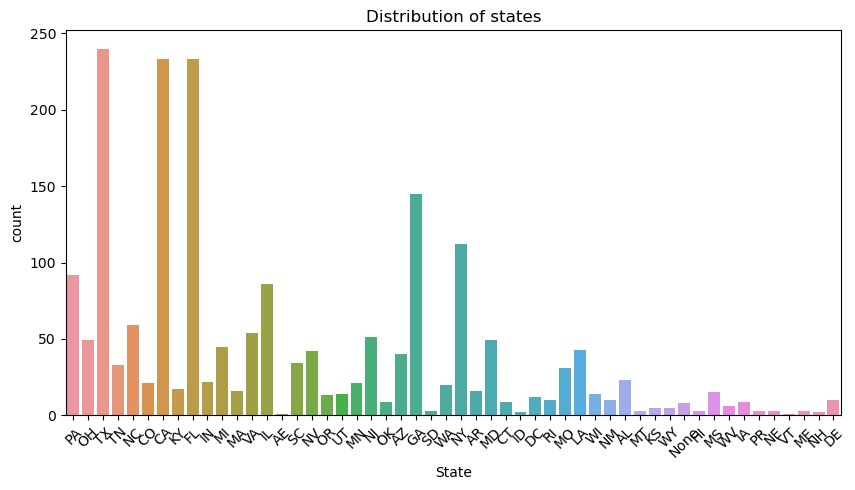

In [17]:
# Explore the "State" Distribution
plt.figure(figsize = (10, 5))
sns.countplot(x="State", data =df)
plt.title('Distribution of states')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

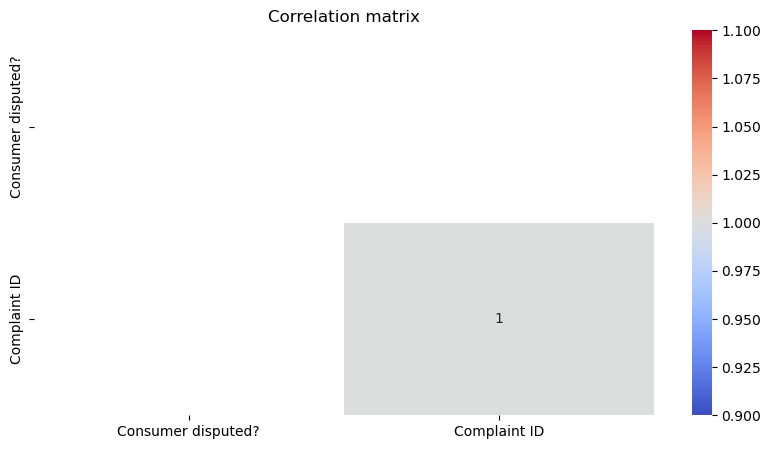

In [18]:
# Corelation matrix for numerical columns
correlation_matrix=df.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show

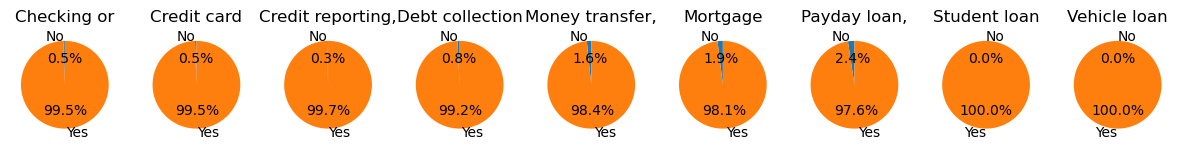

In [19]:
# Group by "Product" and count the occurrences of each "Timely response?"
grouped_data = df.groupby('Product')['Timely response?'].value_counts().unstack(fill_value=0)

# Plot pie charts for each product category
fig, axes = plt.subplots(nrows=1, ncols=len(grouped_data), figsize=(15, 5))

for i, (product, counts) in enumerate(grouped_data.iterrows()):
    # Taking only two words for the title
    title_words = ' '.join(product.split()[:2])
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(title_words)

plt.show()

### Word Cloud for each Product Category

In [20]:
#!pip install wordcloud

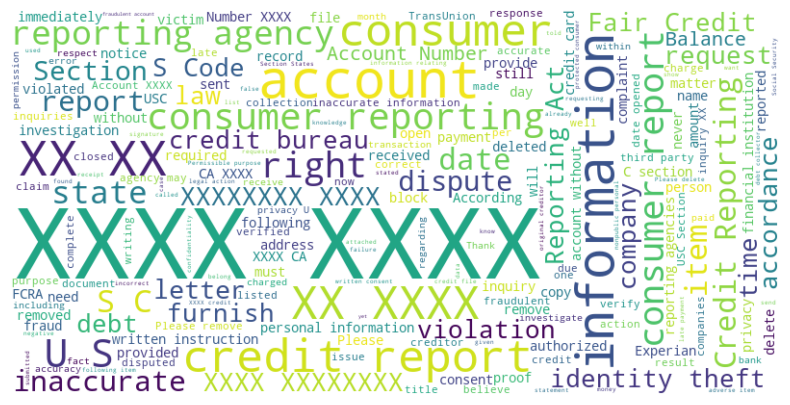

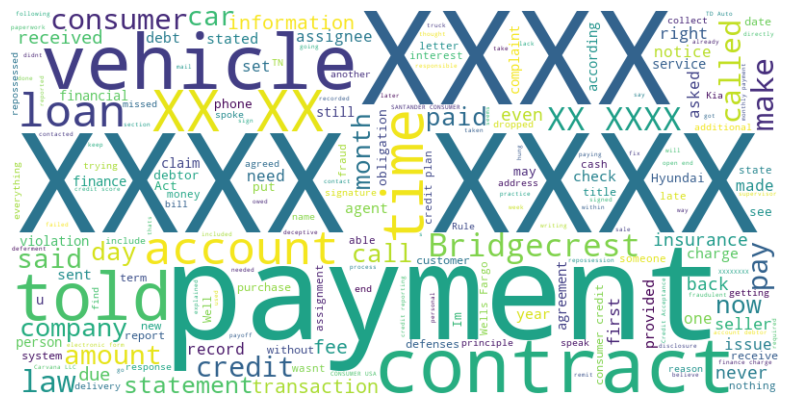

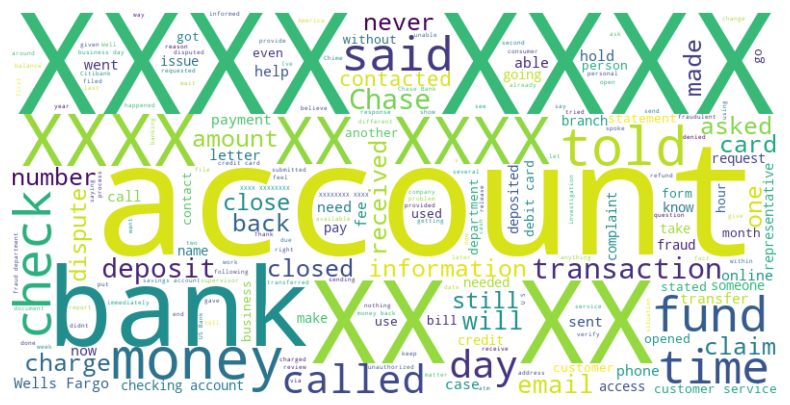

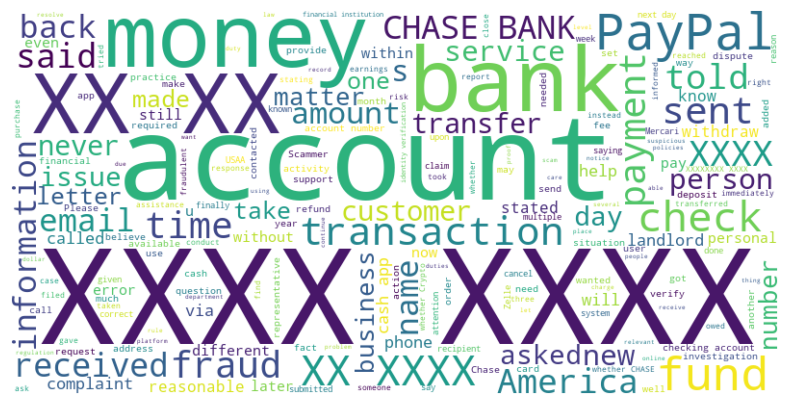

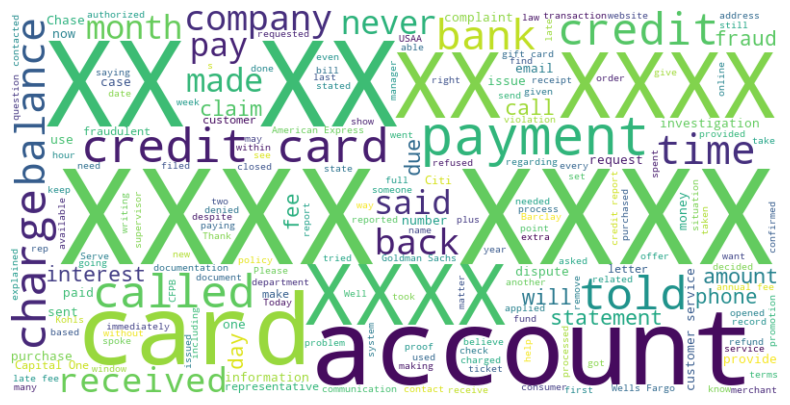

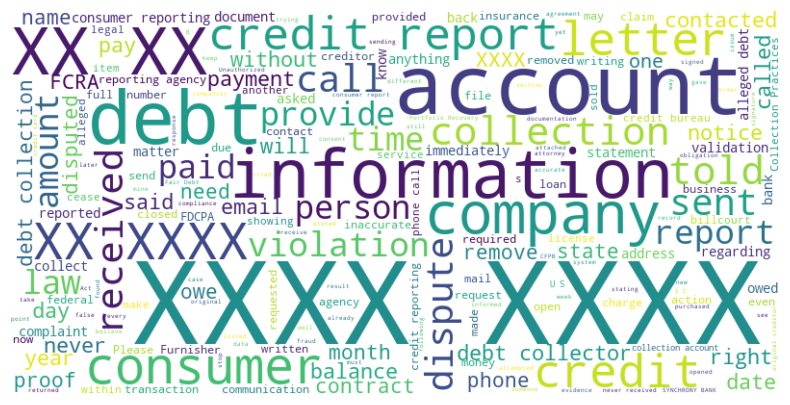

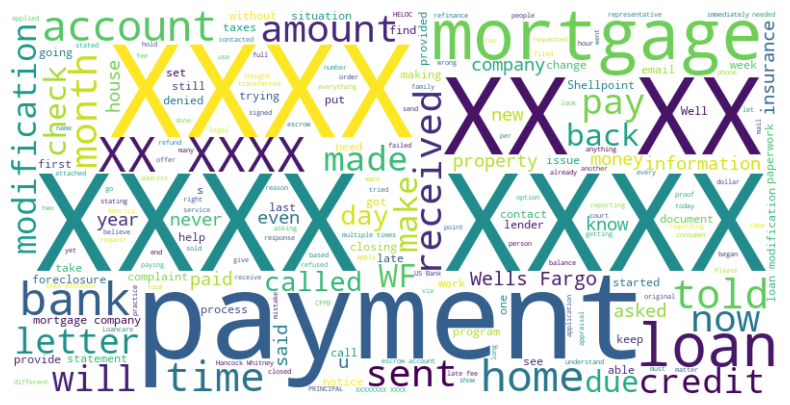

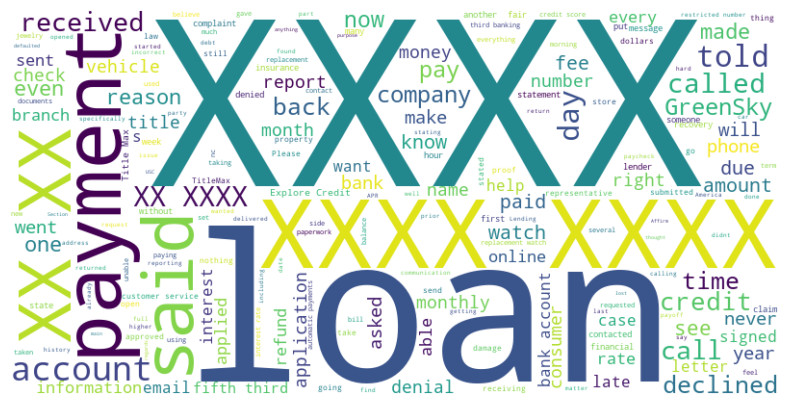

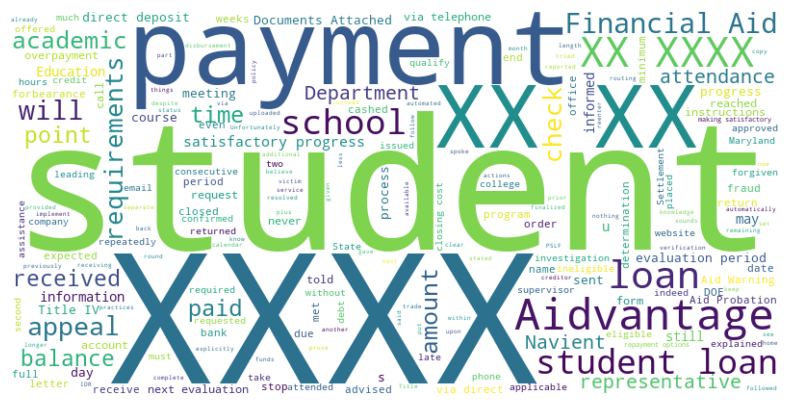

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Reading Dataframe
df=pd.read_csv("complaints-2023-12-13_02_35.csv")

# Drop rows with NaN values for Consumer complaint narrative column
df = df.dropna(subset=['Consumer complaint narrative'])

# Taking top 1000 rows
df=df.head(1000)


df['Consumer complaint narrative'] = df['Consumer complaint narrative'].astype(str)

# Create a WordCloud for each product category
products = df['Product'].unique()

for product in products:
    # Filter data for the specific product
    product_data = df[df['Product'] == product]
    
    # Combine consumer complaint narratives into a single string
    complaint_text = ' '.join(product_data['Consumer complaint narrative'])
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(complaint_text)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [22]:
# Function to count word frequencies
def count_word_frequencies(row):
    product_words = set(row['Product'].lower().split(', '))
    complaint_words = row['Consumer complaint narrative'].lower().split()
    matching_words = [word for word in complaint_words if word in product_words]
    return len(matching_words)

# Create a new column with word frequencies
df['Matching Word Frequencies'] = df.apply(count_word_frequencies, axis=1)


In [23]:
df1=df[["Product", "Consumer complaint narrative", "Matching Word Frequencies"]]
df1[df1['Matching Word Frequencies']!=0].head()

Product                       Consumer complaint narrative  \
58   Mortgage  Rocket Mortgage severely underestimated taxes ...   
129  Mortgage  This complaint is filed against AmeriSave Mort...   
153  Mortgage  I am deeply saddened to share that when I logg...   
155  Mortgage  in XXXX my parents refinanced a mortgage with ...   
223  Mortgage  We had the impression or understanding that th...   

     Matching Word Frequencies  
58                           3  
129                          2  
153                          1  
155                          3  
223                          1

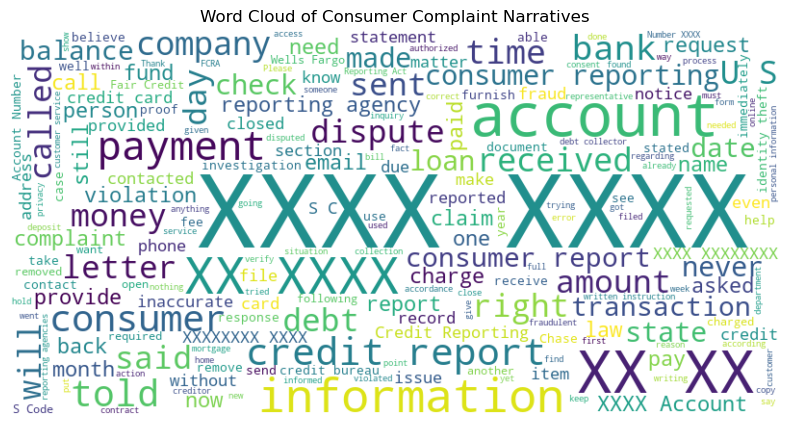

In [24]:
# Combine consumer complaint narratives into a single string
complaint_text = ' '.join(df['Consumer complaint narrative'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(complaint_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()

### Pattern Matching

In [25]:
#!pip install fuzzywuzzy
#!pip install python-Levenshtein

In [26]:
import pandas as pd
import re
from fuzzywuzzy import fuzz

In [27]:
# Reading Dataframe
df=pd.read_csv("complaints-2023-12-13_02_35.csv")

# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()
df1.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'}, inplace=True)

# Drop rows with NaN values for Consumer complaint narrative column
df1 = df1.dropna(subset=['Consumer_complaint_narrative'])

In [28]:
# Function to remove special characters from a string
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Function to find the matched words between Product and Consumer_complaint_narrative using fuzzywuzzy
def find_matched_words(row):
    product_cleaned = remove_special_characters(row['Product'])
    narrative_cleaned = remove_special_characters(row['Consumer_complaint_narrative'])
    
    ratio = fuzz.partial_ratio(product_cleaned, narrative_cleaned)
    
    matched_words = set(product_cleaned.split()).intersection(set(narrative_cleaned.split()))
    matched_string = ' '.join(matched_words) if matched_words else None
    
    return ratio, matched_string

# Create new columns with the matching score and matched words
df1[['Matching_Score', 'Matched_String']] = df1.apply(find_matched_words, axis=1, result_type='expand')


In [29]:
df1.head()

Product  \
0  Credit reporting, credit repair services, or o...   
1                              Vehicle loan or lease   
2  Credit reporting, credit repair services, or o...   
5                        Checking or savings account   
6  Credit reporting, credit repair services, or o...   

                        Consumer_complaint_narrative  Matching_Score  \
0  Closed accounts with XXXX  XXXX XXXX on XX/XX/...            50.0   
1  I fell behind on my payments when the XXXX car...            52.0   
2  I am asking validation of this account, please...            47.0   
5  Truist has hidden the FACT that my account was...            52.0   
6  I am writing to inform you that there is 100 %...            50.0   

   Matched_String  
0       reporting  
1         or loan  
2  credit reports  
5         account  
6          credit

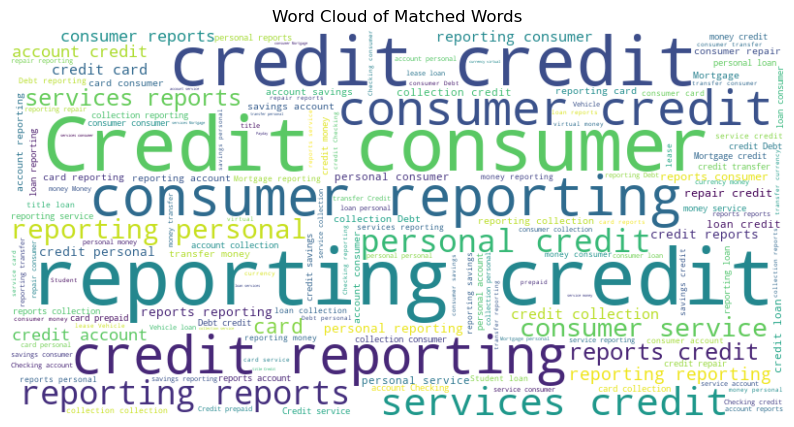

In [30]:
# Word cloud based on the words that are common between the Product and Consumer_complaint_narrative

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['Matched_String'].dropna()))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Matched Words')
plt.show()

### Machine Learning - Approach 1

#### Classifying consumer complaint narrative into predefined products.

In [31]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Reading Dataframe
df=pd.read_csv("complaints-2023-12-13_02_35.csv")

# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()
df1.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'}, inplace=True)

# Drop rows with NaN values for Consumer complaint narrative column
df1 = df1.dropna(subset=['Consumer_complaint_narrative'])

In [33]:
print(df1.shape)
df1.head()

(121523, 2)


Product  \
0  Credit reporting, credit repair services, or o...   
1                              Vehicle loan or lease   
2  Credit reporting, credit repair services, or o...   
5                        Checking or savings account   
6  Credit reporting, credit repair services, or o...   

                        Consumer_complaint_narrative  
0  Closed accounts with XXXX  XXXX XXXX on XX/XX/...  
1  I fell behind on my payments when the XXXX car...  
2  I am asking validation of this account, please...  
5  Truist has hidden the FACT that my account was...  
6  I am writing to inform you that there is 100 %...

In [34]:
# Finding % of the original dataset is not null
# Percentage of complaints with text

total = df1['Consumer_complaint_narrative'].notnull().sum()
round((total/len(df)*100),1)

38.4

In [35]:
unique_products = df["Product"].unique()

for i, product in enumerate(unique_products, start=1):
    print(f"{i}. {product}")

1. Credit reporting, credit repair services, or other personal consumer reports
2. Vehicle loan or lease
3. Debt collection
4. Checking or savings account
5. Credit card or prepaid card
6. Money transfer, virtual currency, or money service
7. Mortgage
8. Student loan
9. Payday loan, title loan, or personal loan


In [36]:
# Sampling the data and taking 10000 random sample

df2 = df1.sample(10000, random_state=1).copy()

In [37]:
# Create a new column 'Product_id' with encoded categories 

df2['Product_id'] = df2['Product'].factorize()[0]
product_id_df = df2[['Product', 'Product_id']].drop_duplicates()

# Dictionaries for future use
product_to_id = dict(product_id_df.values)
id_to_product = dict(product_id_df[['Product_id', 'Product']].values)

# New dataframe
df2.head()

Product  \
219247  Credit reporting, credit repair services, or o...   
15636   Credit reporting, credit repair services, or o...   
274112                                    Debt collection   
82121   Credit reporting, credit repair services, or o...   
160651  Credit reporting, credit repair services, or o...   

                             Consumer_complaint_narrative  Product_id  
219247  FRAUDULENT ACCOUNTS XXXX ) XXXXXXXX XXXX AMOUN...           0  
15636   On ( XX/XX/2023 ) I sent a letter regarding in...           0  
274112  XX/XX/23 My debt was paid to the original debt...           1  
82121   I sent a letter on XX/XX/2022 to XXXX. \nHowev...           0  
160651  In accordance with the Fair Credit Reporting a...           0

<Axes: ylabel='Product'>

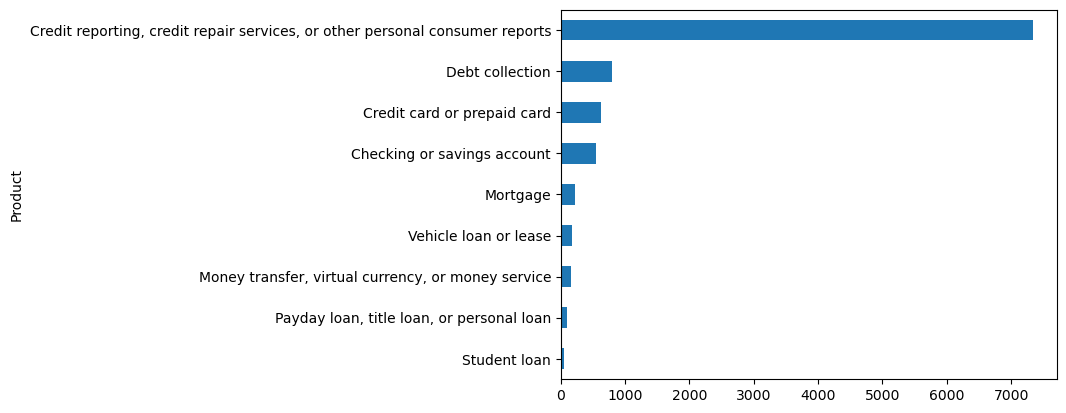

In [38]:
# Number of Complaints in each Product

df2.groupby('Product').Consumer_complaint_narrative.count().sort_values().plot(kind='barh')

# 

In [39]:
# Text Preprocessing 

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# Transform each complaint into a vector
features = tfidf.fit_transform(df2["Consumer_complaint_narrative"]).toarray()

labels = df2["Product_id"]

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 21466 features (TF-IDF score of unigrams and bigrams)


In [40]:
# Finding the three most correlated terms with each of the product categories

N = 3
for Product, Product_id in sorted(product_to_id.items()):
    features_chi2 = chi2(features, labels == Product_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]  
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n %s:" %(Product))
    print("  - Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  - Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))



 Checking or savings account:
  - Most Correlated Unigrams are: overdraft, funds, bank
  - Most Correlated Bigrams are: savings account, wells fargo, checking account

 Credit card or prepaid card:
  - Most Correlated Unigrams are: synchrony, rewards, card
  - Most Correlated Bigrams are: account working, hard pay, monthly acceptable

 Credit reporting, credit repair services, or other personal consumer reports:
  - Most Correlated Unigrams are: called, told, bank
  - Most Correlated Bigrams are: 1681 section, xxxx xxxx, wells fargo

 Debt collection:
  - Most Correlated Unigrams are: collect, collection, debt
  - Most Correlated Bigrams are: debt collection, alleged debt, collect debt

 Money transfer, virtual currency, or money service:
  - Most Correlated Unigrams are: wise, venmo, paypal
  - Most Correlated Bigrams are: limitation placed, cash app, paypal account

 Mortgage:
  - Most Correlated Unigrams are: modification, escrow, mortgage
  - Most Correlated Bigrams are: mortgage 

In [41]:
# Performing a cross-validation analysis using several classification models 

models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [42]:
# Comparison of model performance

cv_df

model_name  fold_idx  accuracy
0   RandomForestClassifier         0    0.7345
1   RandomForestClassifier         1    0.7345
2   RandomForestClassifier         2    0.7340
3   RandomForestClassifier         3    0.7340
4   RandomForestClassifier         4    0.7340
5                LinearSVC         0    0.9030
6                LinearSVC         1    0.8930
7                LinearSVC         2    0.8950
8                LinearSVC         3    0.8920
9                LinearSVC         4    0.8945
10           MultinomialNB         0    0.8305
11           MultinomialNB         1    0.8285
12           MultinomialNB         2    0.8210
13           MultinomialNB         3    0.8190
14           MultinomialNB         4    0.8275
15      LogisticRegression         0    0.8790
16      LogisticRegression         1    0.8760
17      LogisticRegression         2    0.8830
18      LogisticRegression         3    0.8690
19      LogisticRegression         4    0.8835

In [43]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

Mean Accuracy  Standard deviation
model_name                                               
LinearSVC                      0.8955            0.004359
LogisticRegression             0.8781            0.005941
MultinomialNB                  0.8253            0.005007
RandomForestClassifier         0.7342            0.000274

In [44]:
# Model Evaluation

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=1)

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
# Generate the classification report

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=df2['Product'].unique(), output_dict=True)

# Convert the classification report dictionary to a DataFrame for better visualization
df_report = pd.DataFrame(report).transpose()

df_report

precision    recall  \
Credit reporting, credit repair services, or ot...   0.938349  0.982495   
Debt collection                                      0.805369  0.618557   
Student loan                                         1.000000  0.333333   
Vehicle loan or lease                                0.685714  0.585366   
Mortgage                                             0.821429  0.741935   
Checking or savings account                          0.727273  0.861538   
Credit card or prepaid card                          0.815287  0.775758   
Payday loan, title loan, or personal loan            0.600000  0.214286   
Money transfer, virtual currency, or money service   0.782609  0.391304   
accuracy                                             0.900800  0.900800   
macro avg                                            0.797337  0.611619   
weighted avg                                         0.895382  0.900800   

                                                    f1-score    support  
Credit reporting, credit repair services, or ot...  0.959914  1828.0000  
Debt collection                                     0.699708   194.0000  
Student loan                                        0.500000     6.0000  
Vehicle loan or lease                               0.631579    41.0000  
Mortgage                                            0.779661    62.0000  
Checking or savings account                         0.788732   130.0000  
Credit card or prepaid card                         0.795031   165.0000  
Payday loan, title loan, or personal loan           0.315789    28.0000  
Money transfer, virtual currency, or money service  0.521739    46.0000  
accuracy                                            0.900800     0.9008  
macro avg                                           0.665795  2500.0000  
weighted avg                                        0.893703  2500.0000

Text(0.5, 23.52222222222222, 'Predicted')

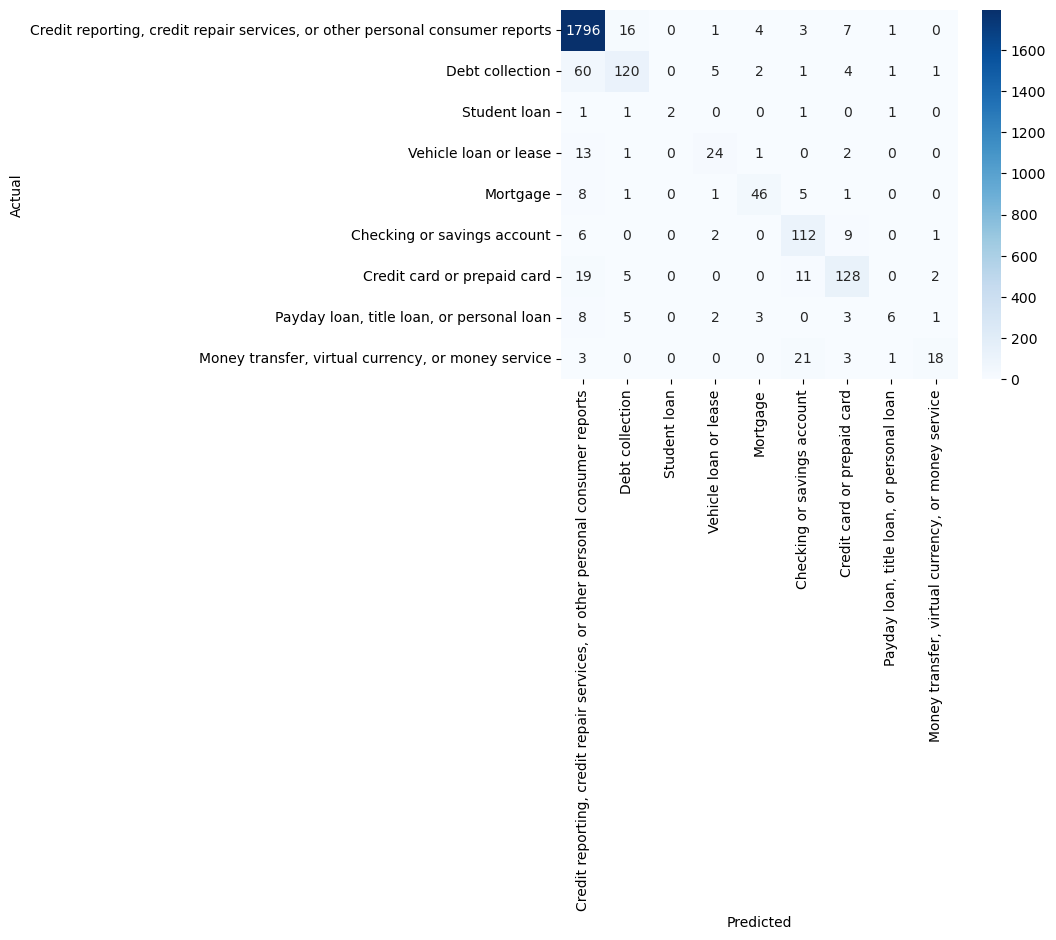

In [46]:
# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=product_id_df["Product"].values, 
            yticklabels=product_id_df["Product"].values)

plt.ylabel('Actual')
plt.xlabel('Predicted')

In [47]:
# Predictions

X = df2['Consumer_complaint_narrative'] 
y = df2['Product'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [48]:
new_complaint = """I fell behind on my payments when the XXXX car sat in repair shops for almost a year. After getting the car back I was making my payments a few days late after the company threatened to repo my car. I replied to their last text saying payment would been made in 4 days when I got paid. The next day they repossessed my car. My payments were not 90 days consecutive missing. I also noticed that all my payments were going directly to interest and nothing to the principal. I called them and tried to make arrangements but the only arrangements they offered were to make an immediate payment or repo. Now for me to get my car back, not only do they want what my loan amount was behind in total but huge fees and bond for a total of {$2100.00}, when payments were only {$320.00}. If one can't pay {$320.00}, how do they expect one to come up with $ XXXX in 15 days? On top of that, to get the car back is the tow and lot fees, which I have not even bothered to check on. I would still have my car had they simply waited 4 days for payment and payments would have been made monthly as required. I have read many reviews on consumer portfolio services and I am not the only XXXX they have done this to. I also noticed a week later the loan company has done a credit inquiry."""

print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Vehicle loan or lease']


In [49]:
df2[df2['Consumer_complaint_narrative'] == new_complaint]

Product                       Consumer_complaint_narrative  \
1  Vehicle loan or lease  I fell behind on my payments when the XXXX car...   

   Product_id  
1           3

### Machine Learning - Approach 2

In [50]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amanjain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Reading Dataframe
df=pd.read_csv("complaints-2023-12-13_02_35.csv")

In [52]:
# Renaming Columns

df.columns = ['Date_Received', 'Product', 'Sub_Product', 'Issue', 'Sub_Issue',
              'Consumer_Complaint_Narrative', 'Company_Public_Response', 'Company', 'State', 'Zip_Code', 'Tags',
              'Consumer_Consent_Provided?', 'Submitted_Via', 'Date_Sent_To_Company',
              'Company_Response_To_Consumer', 'Timely_Response?',
              'Consumer_Disputed?', 'Complaint_Id']

In [53]:
# Drop Un-necessary Columns
df.drop(columns=['Sub_Product', 'Issue', 'Sub_Issue','Company_Public_Response'],inplace=True)

In [54]:
# Drop rows with NaN values for Consumer complaint narrative column

df = df.dropna(subset=['Consumer_Complaint_Narrative']).reset_index(drop=True)

In [55]:
# Number of Complaints in each Product

df.groupby('Product').Consumer_Complaint_Narrative.count().sort_values(ascending=False)

Product
Credit reporting, credit repair services, or other personal consumer reports    89409
Debt collection                                                                  9251
Credit card or prepaid card                                                      7695
Checking or savings account                                                      6543
Mortgage                                                                         3014
Money transfer, virtual currency, or money service                               2038
Vehicle loan or lease                                                            1802
Payday loan, title loan, or personal loan                                        1087
Student loan                                                                      684
Name: Consumer_Complaint_Narrative, dtype: int64

In [56]:
# Creating LabelEncoder object 

encoder = LabelEncoder()
df['Product_Encoding'] = encoder.fit_transform(df['Product'])
df.head()

Date_Received                                            Product  \
0      06/05/23  Credit reporting, credit repair services, or o...   
1      06/05/23                              Vehicle loan or lease   
2      06/05/23  Credit reporting, credit repair services, or o...   
3      06/21/23                        Checking or savings account   
4      06/20/23  Credit reporting, credit repair services, or o...   

                        Consumer_Complaint_Narrative  \
0  Closed accounts with XXXX  XXXX XXXX on XX/XX/...   
1  I fell behind on my payments when the XXXX car...   
2  I am asking validation of this account, please...   
3  Truist has hidden the FACT that my account was...   
4  I am writing to inform you that there is 100 %...   

                             Company State Zip_Code  Tags  \
0        Early Warning Services, LLC    PA    183XX  None   
1  Consumer Portfolio Services, Inc.    OH    43130  None   
2                The CBE Group, Inc.    TX    777XX  None   
3       TRUIST FINANCIAL CORPORATION    TN    372XX  None   
4                      EQUIFAX, INC.    TX    77057  None   

  Consumer_Consent_Provided? Submitted_Via Date_Sent_To_Company  \
0           Consent provided           Web             06/05/23   
1           Consent provided           Web             06/05/23   
2           Consent provided           Web             06/05/23   
3           Consent provided           Web             07/26/23   
4           Consent provided           Web             06/20/23   

      Company_Response_To_Consumer Timely_Response?  Consumer_Disputed?  \
0          Closed with explanation              Yes                 NaN   
1          Closed with explanation              Yes                 NaN   
2  Closed with non-monetary relief              Yes                 NaN   
3          Closed with explanation              Yes                 NaN   
4  Closed with non-monetary relief              Yes                 NaN   

   Complaint_Id  Product_Encoding  
0       7074900                 2  
1       7074426                 8  
2       7074188                 2  
3       7148606                 0  
4       7135003                 2

In [57]:
df[["Product","Product_Encoding"]].drop_duplicates()

Product  Product_Encoding
0    Credit reporting, credit repair services, or o...                 2
1                                Vehicle loan or lease                 8
3                          Checking or savings account                 0
8    Money transfer, virtual currency, or money ser...                 4
11                         Credit card or prepaid card                 1
16                                     Debt collection                 3
20                                            Mortgage                 5
54           Payday loan, title loan, or personal loan                 6
120                                       Student loan                 7

In [58]:
#encoder.inverse_transform(df['Product_Encoding'])

In [59]:
# Removing Stopwords and cleaning of Complaints

stop_words = set(stopwords.words('english'))
df['Filtered_Text'] = df['Consumer_Complaint_Narrative'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

In [60]:
# Dividing the Dataset into Testing and Training set.

X = df.drop(columns = ['Product_Encoding'])
y = df['Product_Encoding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 25)


In [61]:
# Performing text vectorization on training dataset

vectorizer_1 = TfidfVectorizer(max_features=5000)
Y = vectorizer_1.fit_transform(X_train['Filtered_Text'])

print("Shape:",Y.shape)
vocab = vectorizer_1.get_feature_names_out()

Shape: (85066, 5000)


In [62]:
# Performing text vectorization on test dataset

Z = vectorizer_1.transform(X_test['Filtered_Text'])
print("Shape:", Z.shape)

Shape: (36457, 5000)


In [63]:
# Training Multiple Model and Finding the Accuracy

In [64]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_1 = DecisionTreeClassifier(max_depth = 10, random_state = 20)
model = model_1.fit(Y,y_train)
output = model.predict(Z)

accuracy_score(y_test,output)

0.8342705104643827

In [65]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators = 10, random_state = 20)
model = model_2.fit(Y,y_train)
output = model.predict(Z)

accuracy_score(y_test,output)

0.8703952601695147

In [66]:
# Training using XGBoost classifier

from xgboost import XGBClassifier

model_3= XGBClassifier(max_depth = 7, n_estimators = 50)
model = model_3.fit(Y,y_train)
output = model.predict(Z)

accuracy_score(y_test,output)

0.9076171928573388

In [67]:
# Creating Dataframe for Testing Datasets and finding the actual and predicted class

New_output = pd.DataFrame(X_test.copy(deep = True))
New_output['Actual_Class'] = y_test
New_output['Predicted_Class'] = output

New_output = New_output.reset_index(drop=True)

print(New_output.shape)
New_output.head()

(36457, 17)


Date_Received                                            Product  \
0      05/05/23  Credit reporting, credit repair services, or o...   
1      05/22/23  Credit reporting, credit repair services, or o...   
2      04/07/23  Credit reporting, credit repair services, or o...   
3      04/12/23  Credit reporting, credit repair services, or o...   
4      06/17/23  Credit reporting, credit repair services, or o...   

                        Consumer_Complaint_Narrative  \
0  It is Experians duty according to the FCRA to ...   
1  In accordance with the Fair Credit Reporting a...   
2  I'm submitting a CFPB complaint and demanding ...   
3  I value you setting aside some margin to REMOV...   
4  15 U.S. Code $ 1681c-2 a consumer reporting ag...   

                                  Company State Zip_Code  Tags  \
0     Experian Information Solutions Inc.    TX    790XX  None   
1     Experian Information Solutions Inc.    CA    90803  None   
2     Experian Information Solutions Inc.    TX    76063  None   
3                           EQUIFAX, INC.    NJ    07109  None   
4  TRANSUNION INTERMEDIATE HOLDINGS, INC.    GA    30542  None   

  Consumer_Consent_Provided? Submitted_Via Date_Sent_To_Company  \
0           Consent provided           Web             05/05/23   
1           Consent provided           Web             05/22/23   
2           Consent provided           Web             04/07/23   
3           Consent provided           Web             04/12/23   
4           Consent provided           Web             06/17/23   

      Company_Response_To_Consumer Timely_Response?  Consumer_Disputed?  \
0          Closed with explanation              Yes                 NaN   
1          Closed with explanation              Yes                 NaN   
2          Closed with explanation              Yes                 NaN   
3          Closed with explanation              Yes                 NaN   
4  Closed with non-monetary relief              Yes                 NaN   

   Complaint_Id                                      Filtered_Text  \
0       6934714  It Experians duty according FCRA report correc...   
1       7006121  In accordance Fair Credit Reporting act. The l...   
2       6802458  I'm submitting CFPB complaint demanding Credit...   
3       6824110  I value setting aside margin REMOVE portion da...   
4       7132175  15 U.S. Code $ 1681c-2 consumer reporting agen...   

   Actual_Class  Predicted_Class  
0             2                2  
1             2                2  
2             2                2  
3             2                2  
4             2                2

In [68]:
# Dataframe whose Actual and Predicted matches

Matched_df= New_output[New_output['Actual_Class']== New_output['Predicted_Class']]
print(Matched_df.shape)

(33089, 17)


In [69]:
# Dataframe whose Actual and Predicted class differs

Unmatched_df= New_output[New_output['Actual_Class']!= New_output['Predicted_Class']]
print(Unmatched_df.shape)

(3368, 17)
